# Exercise 05
### Sandra Marcela Meneses - código: 201727731


# Neural networks

## 4.1 Little Red Riding Hood Network

Train a neural network to solve the  Little Red Riding Hood problem in sklern and Keras. Try the neural networ with different inputs and report the results.

## a) Red neuronal con Sklearn

Se usa Multi-layer Perceptron (MLP). Dado que son pocos datos se puede usar la función de pérdida LBFGS, la cual para pequeños datasets converge rápido

In [3]:
#Librerias
from sklearn.neural_network import MLPClassifier
import numpy as np

#Se definen los valores de X y Y
X = np.array([[1,1,0,0],[0,1,1,0],[0,0,0,1]])
y = np.array([[1,0,0,0],[0,0,1,1],[0,1,1,0]])
clf = MLPClassifier(solver='lbfgs', alpha=0.05, hidden_layer_sizes=(3), activation='relu', random_state=1)

#Train the model
clf.fit(X,y)

MLPClassifier(activation='relu', alpha=0.05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=3, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

Se dan nuevos ejemplos al modelo para que aprenda

In [4]:
#Predict 
clf.predict([[1,0,1,0],[0,1,0,0]])

array([[0, 0, 1, 0],
       [0, 0, 1, 0]])

Se observa que el modelo tiene 4 entradas, 4 salidas y 3 neuronas

In [5]:
[coef.shape for coef in clf.coefs_]

[(4, 3), (3, 4)]

In [8]:
#Probabilidad de P(y|x) para la muestra x
pred = clf.predict(X)
clf.predict_proba([[0,1,0,1],[0,0,1,1]])

array([[  5.33455694e-02,   6.10319049e-01,   9.46623920e-01,
          6.56078653e-02],
       [  4.54490264e-04,   9.05819057e-01,   9.99548064e-01,
          6.02665101e-01]])

El reporte de clasificación del modelo es

In [9]:
from sklearn.metrics import classification_report
print(classification_report(y,pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00         1
          1       1.00      1.00      1.00         1
          2       1.00      1.00      1.00         2
          3       1.00      1.00      1.00         1

avg / total       1.00      1.00      1.00         5



La función de pérdida del modelo es:

In [10]:
print("Training set score: %f" % clf.score(X,y))
print("Training set loss: %f" % clf.loss_)

Training set score: 1.000000
Training set loss: 0.340942


## b) Red neuronal con Keras

Se define como input_dim las 4 entradas del modelo, units=3 dado que se plantea usar 3 neuronas

In [11]:
#Red neuronal con Keras
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
import pandas as pd

X = [[1,1,0,0],[0,1,1,0],[0,0,0,1]]
y = [[1,0,0,0],[0,0,1,1],[0,1,1,0]]

model = Sequential()
model.add(Dense(units=3, input_dim=4))
model.add(Activation('relu'))
model.add(Dense(units=4))
model.add(Activation('sigmoid'))
model.summary(70)

Using TensorFlow backend.


______________________________________________________________________
Layer (type)                   Output Shape                Param #    
dense_1 (Dense)                (None, 3)                   15         
______________________________________________________________________
activation_1 (Activation)      (None, 3)                   0          
______________________________________________________________________
dense_2 (Dense)                (None, 4)                   16         
______________________________________________________________________
activation_2 (Activation)      (None, 4)                   0          
Total params: 31
Trainable params: 31
Non-trainable params: 0
______________________________________________________________________


In [12]:
from keras.optimizers import SGD
model.compile(loss = 'binary_crossentropy',
              optimizer = SGD(lr=0.01, momentum=0.9, decay=0.0, nesterov=False),
              metrics = ['accuracy'])

In [13]:
X = pd.DataFrame(X)
y = pd.DataFrame(y)

In [14]:
model.fit(X, y, epochs=100, verbose=2)

Epoch 1/100
 - 0s - loss: 0.7819 - acc: 0.5000
Epoch 2/100
 - 0s - loss: 0.7810 - acc: 0.5000
Epoch 3/100
 - 0s - loss: 0.7793 - acc: 0.5000
Epoch 4/100
 - 0s - loss: 0.7770 - acc: 0.5000
Epoch 5/100
 - 0s - loss: 0.7740 - acc: 0.5000
Epoch 6/100
 - 0s - loss: 0.7706 - acc: 0.5000
Epoch 7/100
 - 0s - loss: 0.7667 - acc: 0.5000
Epoch 8/100
 - 0s - loss: 0.7624 - acc: 0.5000
Epoch 9/100
 - 0s - loss: 0.7579 - acc: 0.5000
Epoch 10/100
 - 0s - loss: 0.7532 - acc: 0.5000
Epoch 11/100
 - 0s - loss: 0.7483 - acc: 0.5000
Epoch 12/100
 - 0s - loss: 0.7433 - acc: 0.4167
Epoch 13/100
 - 0s - loss: 0.7382 - acc: 0.4167
Epoch 14/100
 - 0s - loss: 0.7331 - acc: 0.4167
Epoch 15/100
 - 0s - loss: 0.7280 - acc: 0.4167
Epoch 16/100
 - 0s - loss: 0.7229 - acc: 0.4167
Epoch 17/100
 - 0s - loss: 0.7179 - acc: 0.5000
Epoch 18/100
 - 0s - loss: 0.7129 - acc: 0.5000
Epoch 19/100
 - 0s - loss: 0.7080 - acc: 0.5000
Epoch 20/100
 - 0s - loss: 0.7032 - acc: 0.5000
Epoch 21/100
 - 0s - loss: 0.6985 - acc: 0.5000
E

In [15]:
score = model.evaluate(X, y)
print('Test score:', score[0])
print('Test accuracy:', score[1])

3/3 [==============================] - 0s 14ms/step
Test score: 0.607127606869
Test accuracy: 0.666666686535


In [16]:
# calculate predictions
predictions = model.predict(X)
predictions

array([[ 0.4322854 ,  0.4017013 ,  0.54227883,  0.40929693],
       [ 0.36693549,  0.52426869,  0.75919527,  0.5432592 ],
       [ 0.42057905,  0.41288441,  0.56706911,  0.41837087]], dtype=float32)

_

## 4.2 Boston House Price Prediction

In the next questions we are going to work using the dataset *Boston*. This dataset measures the influence of socioeconomical factors on the price of several estates of the city of Boston. This dataset has 506 instances, each one characterized by 13 features:

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per 10,000 USD
* PTRATIO - pupil-teacher ratio by town
* B - $1000(Bk - 0.63)^2$ where $Bk$ is the proportion of blacks by town
* LSTAT - % lower status of the population

Output variable:
* MEDV - Median value of owner-occupied homes in 1000's USD

**Note:** In this exercise we are going to predict the price of each estate, which is represented in the `MEDV` variable. It is important to remember that we are always aiming to predict `MEDV`, no matter which explanatory variables we are using. That means, in some cases we will use a subset of the 13 previously mentioned variables, while in other cases we will use all the 13 variables. But in no case we will change the dependent variable $y$.



1. Load the dataset using `from sklearn.datasets import load_boston`.
2. Create a DataFrame using the attribute `.data` from the loading function of Scikit-learn.
3. Assign the columns of the DataFrame so they match the `.feature_names` attribute from the loading function of Scikit-learn. 
4. Assign a new column to the DataFrame which holds the value to predict, that means, the `.target` attribute of the loading function of Scikit-learn. The name of this columns must be `MEDV`.
5. Use the function `.describe()` from Pandas for obtaining statistics about each column.


In [17]:
#1.Load the dataset using from sklearn.datasets import load_boston.
from sklearn.datasets import load_boston

In [18]:
#2.Create a DataFrame using the attribute .data from the loading function of Scikit-learn.
import pandas as pd
boston = load_boston()
df = pd.DataFrame(boston.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [19]:
#3.Assign the columns of the DataFrame so they match the .feature_names attribute from the loading function of Scikit-learn.
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [20]:
#4.Assign a new column to the DataFrame which holds the value to predict, that means, the .target attribute of the loading 
#function of Scikit-learn. The name of this columns must be MEDV.
df["MEDV"] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [21]:
#5.Use the function .describe() from Pandas for obtaining statistics about each column.
#se puede identificar la media, desviación estándar, valores mínimos, máximos y percentiles
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## 4.3 Feature analysis:

Using the DataFrame generated in the previous section:
* Filter the dataset to just these features:
     * Explanatory: 'LSTAT', 'INDUS', 'NOX', 'RM', 'AGE'
     * Dependent: 'MEDV'.

Se filtran las variables 'LSTAT', 'INDUS', 'NOX', 'RM', 'AGE' por un lado y por el otro la variable 'MEDV'

In [22]:
df.filter(items=['LSTAT', 'INDUS', 'NOX', 'RM', 'AGE'])

,LSTAT,INDUS,NOX,RM,AGE
0,4.98,2.31,0.538,6.575,65.2
1,9.14,7.07,0.469,6.421,78.9
2,4.03,7.07,0.469,7.185,61.1
3,2.94,2.18,0.458,6.998,45.8
4,5.33,2.18,0.458,7.147,54.2
5,5.21,2.18,0.458,6.430,58.7
6,12.43,7.87,0.524,6.012,66.6
7,19.15,7.87,0.524,6.172,96.1
8,29.93,7.87,0.524,5.631,100.0
9,17.10,7.87,0.524,6.004,85.9


In [23]:
df.filter(items=['MEDV'])

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
5,28.7
6,22.9
7,27.1
8,16.5
9,18.9


* Generate a scatter matrix among the features mentioned above using Pandas (`scatter_matrix`) or Seaborn (` pairplot`).
     * Do you find any relationship between the features?

Se genera el gráfico scatter_matrix. Se identifican algunas correlaciones positivas entre las variables AGE y LSTAT, NOX y AGE lo cual quiere decir que si aumenta una variable también aumentará la otra.  Por el contrario, existen correlaciones negativas entre la variable LSTAT y RM.
Parece no existir una correlación entre variables como LSTAT y INDUS, o NOX y RM.

Se realiza el gráfico usando PANDAS y usando SEABORN

<function matplotlib.pyplot.show>

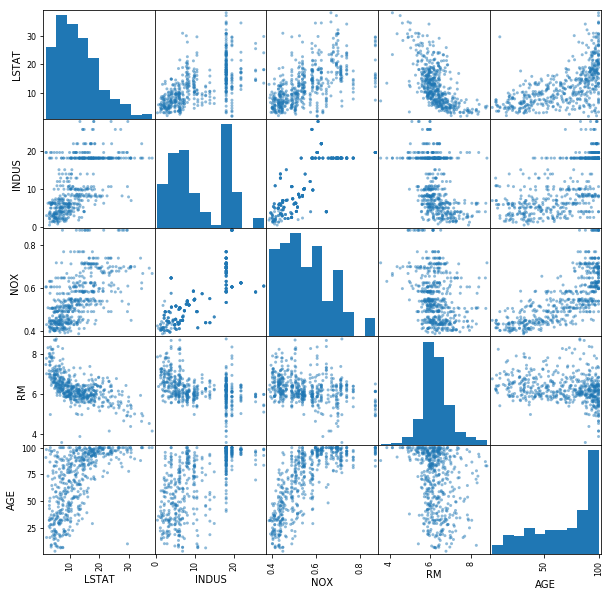

In [25]:
from pandas.plotting import scatter_matrix
%matplotlib inline
import matplotlib.pyplot as plt

attributes = ['LSTAT', 'INDUS', 'NOX', 'RM', 'AGE']
scatter_matrix(df[attributes], figsize=(10,10))
plt.show

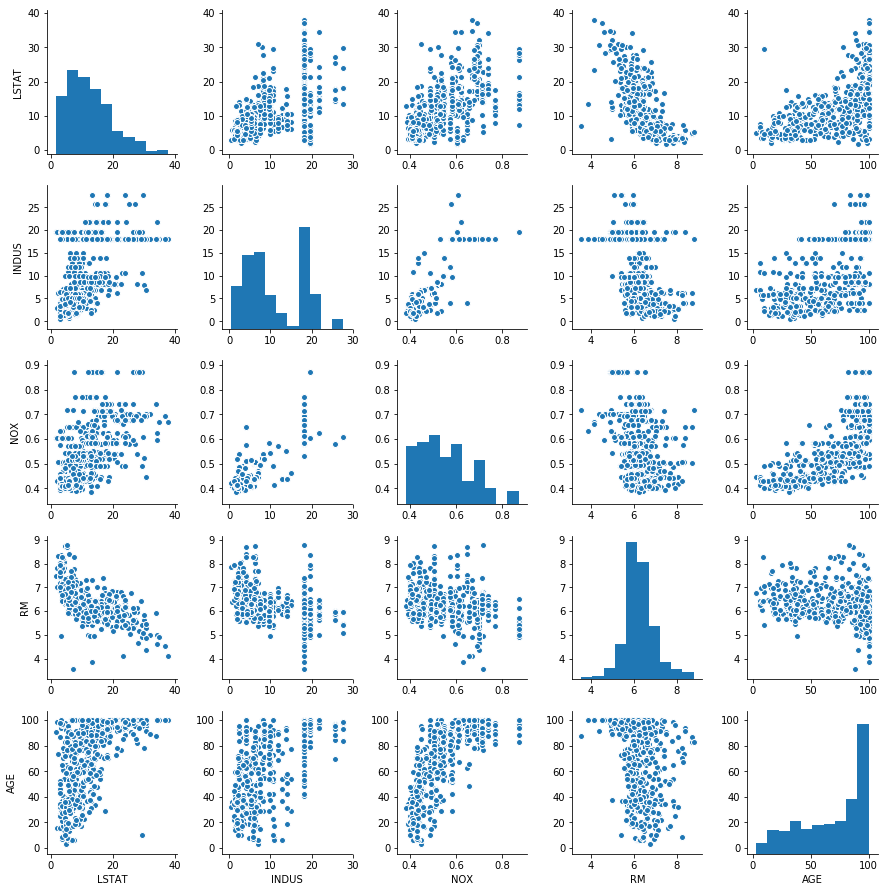

In [26]:
import seaborn as sns
attributes = ['LSTAT', 'INDUS', 'NOX', 'RM', 'AGE']
sns.pairplot(df[attributes])

* Generate the correlation matrix between these variables using `numpy.corrcoef`. Also include `MEDV`.
     * Which characteristics are more correlated?
     * BONUS: Visualize this matrix as heat map using Pandas, Matplotlib or Seaborn.

La matriz de correlación es la siguiente:

In [27]:
import numpy as np
attributes = ['LSTAT', 'INDUS', 'NOX', 'RM', 'AGE', 'MEDV']
bos= df[attributes]
np.corrcoef(bos, rowvar=False)

array([[ 1.        ,  0.60379972,  0.59087892, -0.61380827,  0.60233853,
        -0.73766273],
       [ 0.60379972,  1.        ,  0.76365145, -0.39167585,  0.64477851,
        -0.48372516],
       [ 0.59087892,  0.76365145,  1.        , -0.30218819,  0.7314701 ,
        -0.42732077],
       [-0.61380827, -0.39167585, -0.30218819,  1.        , -0.24026493,
         0.69535995],
       [ 0.60233853,  0.64477851,  0.7314701 , -0.24026493,  1.        ,
        -0.37695457],
       [-0.73766273, -0.48372516, -0.42732077,  0.69535995, -0.37695457,
         1.        ]])

In [28]:
#Se visualiza la matriz con títulos de las columnas
bos.corr()

,LSTAT,INDUS,NOX,RM,AGE,MEDV
LSTAT,1.000000,0.603800,0.590879,-0.613808,0.602339,-0.737663
INDUS,0.603800,1.000000,0.763651,-0.391676,0.644779,-0.483725
NOX,0.590879,0.763651,1.000000,-0.302188,0.731470,-0.427321
RM,-0.613808,-0.391676,-0.302188,1.000000,-0.240265,0.695360
AGE,0.602339,0.644779,0.731470,-0.240265,1.000000,-0.376955
MEDV,-0.737663,-0.483725,-0.427321,0.695360,-0.376955,1.000000


De acuerdo con la anterior matriz de correlación, están más correlacionadas las variables INDUS y NOX las cuales hacen referencia a la proporción de acres de negocios no minoristas por pueblo y concentración de óxidos nítricos en partes por 10 millones. Dado que la correlación es positiva, si aumenta una variable la otra también lo hará.

Por otro lado, hay una corralción alta y negativa entre las variable respuesta MEDV y LSTAT, las cuales hacen referencia al % de  población con status más bajo y el valor medio de las viviendas ocupadas por sus propietarios en USD 1000. Es claro que entre menos status se tenga, mas difícil será acceder a una vivienda mas costosa.

## Bono

Se grafica el heat map de la matriz de correlación usando seaborn 

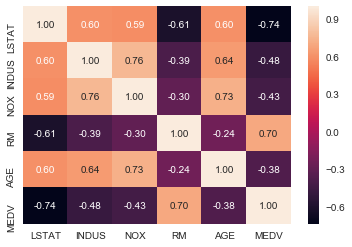

In [29]:
#Heatmap with seaborn
import seaborn as sns; sns.set()
%matplotlib inline

sns.heatmap(bos.corr(),annot=True, fmt=".2f")

## 4.4 Modeling linear and non linear relationships

* Generate two new subsets filtering these characteristics:
     * $D_1$:  $X = \textit{'RM'}$, $y = \textit{'MEDV'}$
     * $D_2$:  $X = \textit{'LSTAT'}$, $y = \textit{'MEDV'}$

Se generan dos nuevos dataframes D1 y D2 cada uno con las variables indicadas

In [30]:
col1 = ['RM','MEDV']
col2 = ['LSTAT','MEDV']

#D1
D1 = df[col1]
print(D1.head())
print(D1.shape)

#D2
D2 = df[col2]
print(D2.head())
print(D2.shape)

      RM  MEDV
0  6.575  24.0
1  6.421  21.6
2  7.185  34.7
3  6.998  33.4
4  7.147  36.2
(506, 2)
   LSTAT  MEDV
0   4.98  24.0
1   9.14  21.6
2   4.03  34.7
3   2.94  33.4
4   5.33  36.2
(506, 2)


* For each subset, generate a training partition and a test partition using a ratio of $ 70 \% - 30 \% $

In [31]:
from sklearn.model_selection import train_test_split

#train/test
train_D1, test_D1 = train_test_split(D1,test_size=0.3, random_state=1)
print(train_D1.shape)
print(test_D1.shape)

train_D2, test_D2 = train_test_split(D2,test_size=0.3, random_state=1)
print(train_D2.shape)
print(test_D2.shape)

(354, 2)
(152, 2)
(354, 2)
(152, 2)


* Train a linear regression model on both subsets of data:
     * Report the mean square error on the test set
     * Print the values of $ w $ and $ w_0 $ of the regression equation
     * Generate a graph where you visualize the line obtained by the regression model in conjunction with the training data and the test data

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

lm_D1 = LinearRegression(fit_intercept=True)
lm_D2 = LinearRegression(fit_intercept=True)

#Variables X y Y
X_train_D1 = train_D1[["RM"]]
y_train_D1 = train_D1[["MEDV"]]
X_train_D2 = train_D2[["LSTAT"]]
y_train_D2 = train_D2[["MEDV"]]

X_test_D1 = test_D1[["RM"]]
y_test_D1 = test_D1[["MEDV"]]
X_test_D2 = test_D2[["LSTAT"]]
y_test_D2 = test_D2[["MEDV"]]

#Train the models
lm_D1.fit(X_train_D1, y_train_D1)
lm_D2.fit(X_train_D2, y_train_D2)

#Report the mean square error on the test set
#Prediction with the test sample
y_pred_D1 = lm_D1.predict(X_test_D1)
y_pred_D2 = lm_D2.predict(X_test_D2)

#Cálculo del MSE
mse_D1 = 'MSE:', metrics.mean_squared_error(y_test_D1, y_pred_D1)
print("El MSE del modelo D1 es: " + str(mse_D1))

mse_D2 = 'MSE:', metrics.mean_squared_error(y_test_D2, y_pred_D2)
print("El MSE del modelo D2 es: " + str(mse_D2))

El MSE del modelo D1 es: ('MSE:', 36.517214730838624)
El MSE del modelo D2 es: ('MSE:', 42.620243471539709)


Se imprime los valores obtenidos como el intercepto y el coeficiente que acompaña el vaor de x en cada uno de los 2 modelos

In [34]:
#Print the values of  w  and  w0  of the regression equation
print('Model-D1: \n', "Intercepto:", lm_D1.intercept_, "\n", "Coeficiente de x:",  lm_D1.coef_)
print('Model-D2: \n', "Intercepto:", lm_D2.intercept_, "\n", "Coeficiente de x:",  lm_D2.coef_)

Model-D1: 
 Intercepto: [-30.57103241] 
 Coeficiente de x: [[ 8.46109164]]
Model-D2: 
 Intercepto: [ 34.22183685] 
 Coeficiente de x: [[-0.9166916]]


Se genera la gráfica con la línea de tendencia obtenida a partir de la predicción en cada modelo

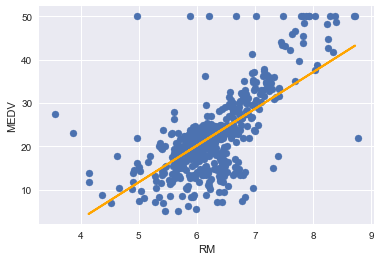

In [36]:
#Generate a graph where you visualize the line obtained by the regression model in conjunction with the training data 
#and the test data

# Plot Model D1
df.columns
y_ = df['MEDV'].values
X1_ = df['RM'].values
plt.scatter(X1_,y_)
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.plot(X_test_D1, y_pred_D1, color='orange', lw=2)
plt.show()

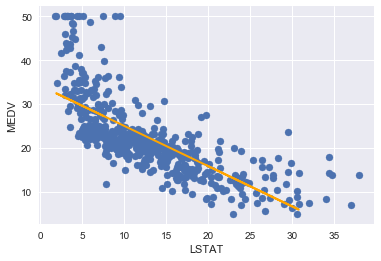

In [37]:
#Plot Model D2
df.columns
y_ = df['MEDV'].values
X2_ = df['LSTAT'].values
plt.scatter(X2_,y_)
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.plot(X_test_D2, y_pred_D2, color='orange', lw=2)
plt.show()

How does the model perform on $ D_1 $ and $ D_2 $? Why?

D1: El modelo estimado es  $\hat Y = -30.571 + 8.461 RM$, esto quiere decir que por cada unidad que aumente RM, Y aumentará en 8.461 unidades.

D2: El modelo estimado es  $\hat Y = 34.221 - 0.916LSTAT$, esto quiere decir que por cada unidad que aumente LSTAT, Y disminuirá en 0,916 unidades.

## 4.5 Training a regression model

* Generate a 70-30 partitioning of the data **using all the features**. (Do not include the dependent variable `MEDV`)

Se crea un nuevo dataframe, a partir del creado anteriormente "df" incluyendo todas las variables menos le predictora MEDV. Se usa .drop para eliminarla

In [39]:
from sklearn.model_selection import train_test_split

boston2 = df.drop(['MEDV'], axis=1)
boston2

#train/test
X_train_all, X_test_all = train_test_split(boston2,test_size=0.3, random_state=1)
y_train_all, y_test_all = train_test_split(df[["MEDV"]],test_size=0.3, random_state=1)

print(X_train_all.shape)
print(X_test_all.shape)
print(y_train_all.shape)
print(y_test_all.shape)
print(X_train_all.head())
print(X_test_all.head())

(354, 13)
(152, 13)
(354, 1)
(152, 1)
        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS   RAD    TAX  \
13   0.62976   0.0   8.14   0.0  0.538  5.949  61.8  4.7075   4.0  307.0   
61   0.17171  25.0   5.13   0.0  0.453  5.966  93.4  6.8185   8.0  284.0   
377  9.82349   0.0  18.10   0.0  0.671  6.794  98.8  1.3580  24.0  666.0   
39   0.02763  75.0   2.95   0.0  0.428  6.595  21.8  5.4011   3.0  252.0   
365  4.55587   0.0  18.10   0.0  0.718  3.561  87.9  1.6132  24.0  666.0   

     PTRATIO       B  LSTAT  
13      21.0  396.90   8.26  
61      19.7  378.08  14.44  
377     20.2  396.90  21.24  
39      18.3  395.63   4.32  
365     20.2  354.70   7.12  
        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS   RAD    TAX  \
307  0.04932  33.0   2.18   0.0  0.472  6.849  70.3  3.1827   7.0  222.0   
343  0.02543  55.0   3.78   0.0  0.484  6.696  56.4  5.7321   5.0  370.0   
47   0.22927   0.0   6.91   0.0  0.448  6.030  85.5  5.6894   3.0  233.0   
67   0.05789  12.5   

### Linear regression

* Train a linear regression model with the objective of predicting the output variable `MEDV`.
     * Report the mean square error on the test set

Se usa metrics de sklearn para caluclar el MSE

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

lm_all = LinearRegression(fit_intercept=True)

#Train the model
lm_all.fit(X_train_all, y_train_all)

#Report the mean square error on the test set
#Predict with el test sample
y_pred_all = lm_all.predict(X_test_all)

#MSE
mse_all = 'MSE:', metrics.mean_squared_error(y_test_all, y_pred_all)
print("El MSE del modelo es: " + str(mse_all))

El MSE del modelo es: ('MSE:', 19.829609248606143)


### MLP Regressor

* Train a regression model using `MLPRegressor` in order to predict the output variable` MEDV`.
     * Report the mean square error on the test set

In [41]:
from sklearn.neural_network import MLPRegressor

MLP_all = MLPRegressor(activation='relu',solver='lbfgs', learning_rate='adaptive')
MLP_all

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='adaptive',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [42]:
from sklearn import metrics

#Train the model
MLP_all.fit(X_train_all, y_train_all)

#Report the mean square error on the test set
#Predict with the test sample
y_pred_MLP_all = MLP_all.predict(X_test_all)

#MSE
mse_MLP_all = 'MSE:', metrics.mean_squared_error(y_test_all, y_pred_MLP_all)
print("El MSE del modelo es: " + str(mse_MLP_all))

El MSE del modelo es: ('MSE:', 28.1682070895592)


C:\Users\marce\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


* Scale the data so that they have zero mean variance one per feature (only $ X $). You can use the following piece of code:

In [43]:
#python
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
sc_x.fit(boston2)
X_train_s = sc_x.transform(X_train_all)
X_test_s = sc_x.transform(X_test_all)

#Check more information about `StandardScaler` [here](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

### Linear Regression - with scaled data

* Train the following models:
     1. Train a linear regression model using the scaled data.
         * Report the mean square error on the test set

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

lm_s = LinearRegression(fit_intercept=True)

#Train the model
lm_s.fit(X_train_s, y_train_all)

#Report the mean square error on the test set
#Predict with the test sample
y_pred_s = lm_s.predict(X_test_s)

#MSE
mse_s = 'MSE:', metrics.mean_squared_error(y_test_all, y_pred_s)
print("El MSE del modelo es: " + str(mse_s))

El MSE del modelo es: ('MSE:', 19.829609248605099)


### MultiLayer Perceptron

    2. Train a regression model using a 2-layer MultiLayer Perceptron (128 neurons in the first and 512 in the second) and with the **scaled data**.
             * Report the mean square error on the test set

In [45]:
from sklearn.neural_network import MLPRegressor

perc = MLPRegressor(activation='relu', hidden_layer_sizes=(128,512), solver='lbfgs')
print("Model with MLP: \n" , perc)

Model with MLP: 
 MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(128, 512), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)


In [47]:
#Train the model
pred_per = perc.fit(X_train_s, y_train_all)

C:\Users\marce\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [48]:
#Predict with the test sample
y_pred_perc = perc.predict(X_test_s)

#MSE
mse_perc = 'MSE:', metrics.mean_squared_error(y_test_all, y_pred_perc)
print("El MSE del modelo es: " + str(mse_perc))

El MSE del modelo es: ('MSE:', 12.50707960595013)


     3. Which model has better performance? Why?

El modelo que mejor desempeño obtiene es el modleo MLPRegressor dado que genera un menor MSE

In [50]:
print("El MSE del modelo -LinearRegression- sin escalar- es: " + str(mse_all))
print("El MSE del modelo -MLPRegressor- sin escalar- es: " + str(mse_MLP_all))
print("El MSE del modelo -LinearRegression- con data escalada es: " + str(mse_s))
print("El MSE del modelo -MLPRegressor-con 2 layers, 128 y 512 neuronas- es: " + str(mse_perc))

El MSE del modelo -LinearRegression- sin escalar- es: ('MSE:', 19.829609248606143)
El MSE del modelo -MLPRegressor- sin escalar- es: ('MSE:', 28.1682070895592)
El MSE del modelo -LinearRegression- con data escalada es: ('MSE:', 19.829609248605099)
El MSE del modelo -MLPRegressor-con 2 layers, 128 y 512 neuronas- es: ('MSE:', 12.50707960595013)
